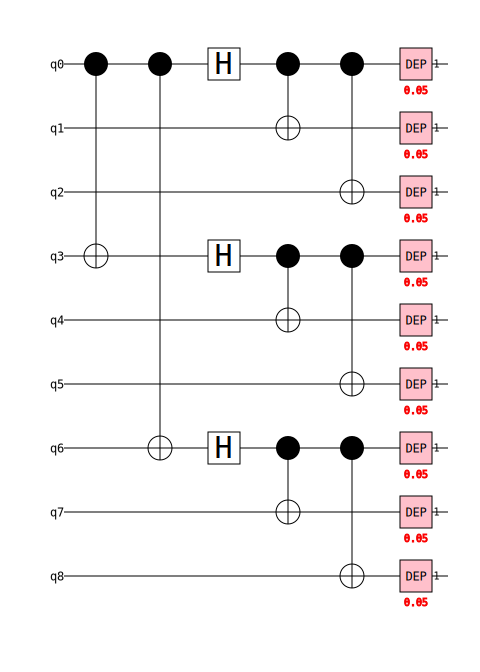

In [13]:
import stim
import numpy as np
from IPython.display import SVG, display, Math
import matplotlib.pyplot as plt
from typing import Counter
import sys, os; sys.path.append(os.path.abspath(".."))

# --- Parameters ---
chance = 0.05

# --- Build circuit (|0_L> for the 9-qubit Shor code) ---
circuit = stim.Circuit()
circuit.append("CNOT", [0, 3])
circuit.append("CNOT", [0, 6])
circuit.append("H", [0, 3, 6])
circuit.append("CNOT", [0, 1])
circuit.append("CNOT", [3, 4])
circuit.append("CNOT", [6, 7])
circuit.append("CNOT", [0, 2])
circuit.append("CNOT", [3, 5])
circuit.append("CNOT", [6, 8])

# noise on data qubits (after encoding)
circuit.append("DEPOLARIZE1", range(9), chance)

# Show circuit diagram as SVG
SVG(str(circuit.diagram("timeline")))

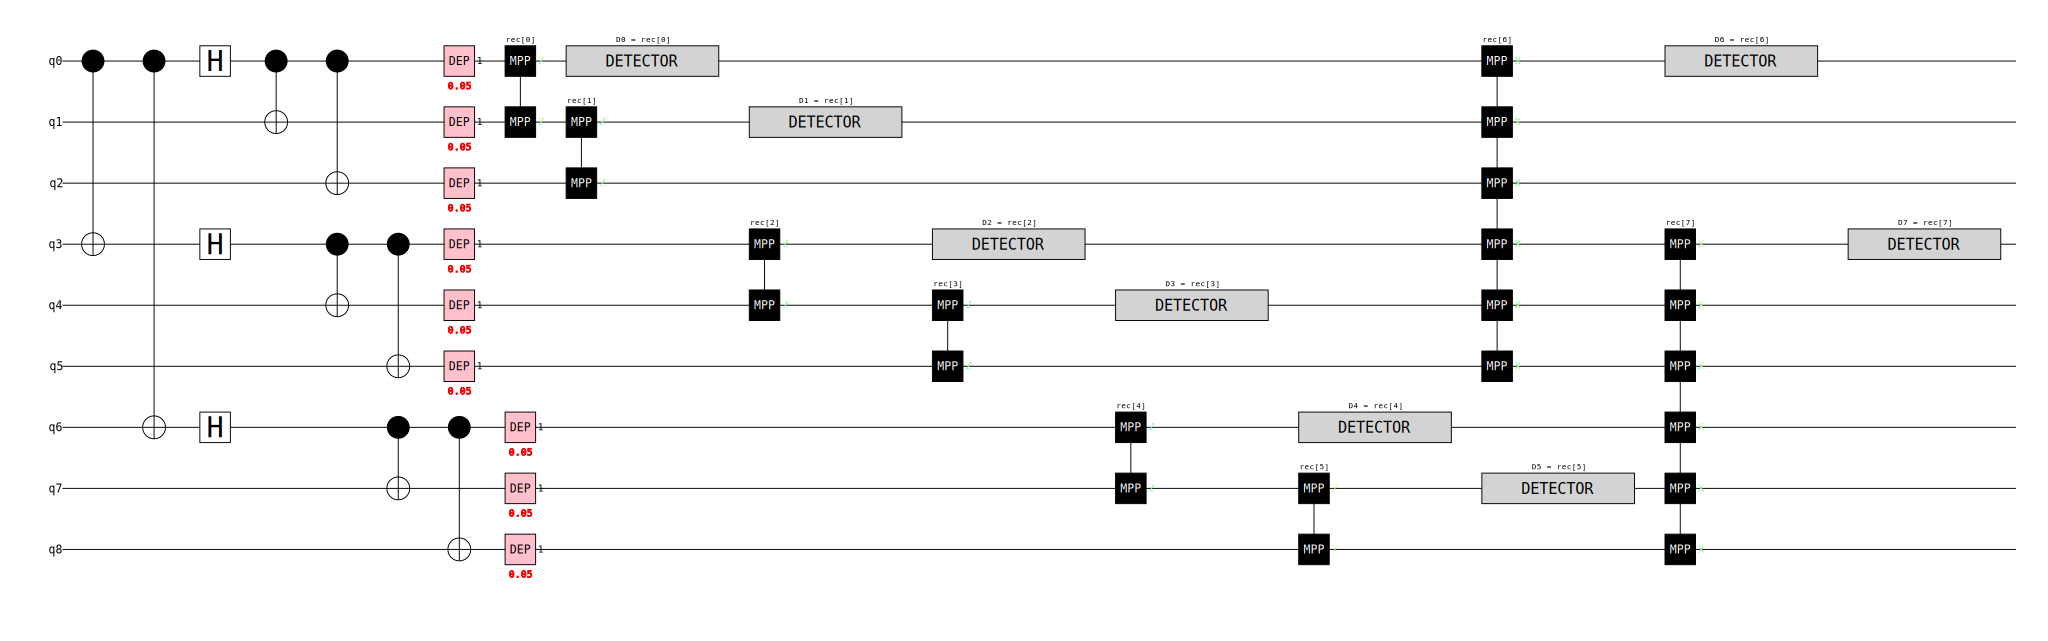

In [23]:
import stim

chance = 0.05

circuit = stim.Circuit("""
# --- Encode |0_L> (9-qubit Shor) ---
CX 0 3 0 6
H 0 3 6
CX 0 1 0 2 3 4 3 5 6 7 6 8

# --- Single-qubit depolarizing noise on all data qubits ---
DEPOLARIZE1(0.05) 0 1 2 3 4 5 6 7 8

# --- Measure Z-type stabilizers (detect X errors within each block) ---
MPP Z0*Z1
DETECTOR rec[-1]
MPP Z1*Z2
DETECTOR rec[-1]

MPP Z3*Z4
DETECTOR rec[-1]
MPP Z4*Z5
DETECTOR rec[-1]

MPP Z6*Z7
DETECTOR rec[-1]
MPP Z7*Z8
DETECTOR rec[-1]

# --- Measure X-type stabilizers (detect Z errors across blocks) ---
MPP X0*X1*X2*X3*X4*X5
DETECTOR rec[-1]
MPP X3*X4*X5*X6*X7*X8
DETECTOR rec[-1]
""")

# Show circuit diagram as SVG
SVG(str(circuit.diagram("timeline")))

In [ ]:
sampler = circuit.compile_detector_sampler()
shots = 1000
syndromes = sampler.sample(shots)  # shape: [shots, 8]  (8 stabilizers)
print(syndromes.shape, syndromes[:5])

(1000, 8) [[False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False False False False False False False False]
 [False  True False False False False  True False]]
